# **EDA Proyecto 4 IA**

El presente análisis exploratorio de datos (EDA) se realiza sobre el conjunto de datos **`online_gaming_insights.csv`**, que recopila información sobre el **comportamiento y las preferencias de jugadores en línea**. La base incluye variables demográficas (edad, género, país), hábitos de juego (horas jugadas, frecuencia semanal, tipo de dispositivo), motivaciones y nivel de interacción social, junto con la variable objetivo **`EngagementLevel`**, que representa el grado de compromiso del jugador con la plataforma (por ejemplo, *High*, *Medium* o *Low*).

El propósito del EDA es comprender la estructura de los datos, identificar posibles problemas de calidad y descubrir patrones o relaciones relevantes entre las variables que puedan influir en el nivel de engagement.

Durante este proceso se realizará:

1. Revisión del porcentaje de valores nulos y de ceros, verificando su impacto y sentido en las variables.
2. Análisis descriptivo y visual mediante histogramas, gráficos de barras y distribución de la variable objetivo.
3. Detección y tratamiento de registros inconsistentes y outliers.
4. Generación de un **mapa de calor de correlación** para eliminar variables altamente correlacionadas y evitar redundancias.
5. Aplicación de un algoritmo de **agrupamiento (K-Means, K-Medoids o SOM)** para segmentar los jugadores según sus características, determinando el número óptimo de clusters mediante el coeficiente de silueta o el método del codo.
6. Descripción interpretativa de los clusters formados, destacando las diferencias principales entre ellos.

Con estos pasos, el EDA permitirá establecer una base sólida para la etapa posterior de modelado, garantizando que los datos utilizados sean representativos, limpios y útiles para generar un modelo de aprendizaje automático confiable.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## *Lectura del archivo y pequeña muestra*

In [ ]:

path = "/content/online_gaming_insights.csv"

df = pd.read_csv(path)

print("Shape:", df.shape)
display(df.head(20))


Shape: (40034, 13)


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
5,9005,37,Male,Europe,RPG,20.561855,0,Easy,2,81,74,22,Low
6,9006,25,Male,USA,Action,9.752716,0,Hard,1,50,13,2,Low
7,9007,25,Female,Asia,RPG,4.401729,0,Medium,10,48,27,23,Medium
8,9008,38,Female,Europe,Simulation,18.152733,0,Easy,5,101,23,41,Medium
9,9009,38,Female,Other,Sports,23.942772,0,Easy,13,95,99,36,High


##*Porcentaje de nulos en la base de datos*

El código:
* Calcula nulos por columna (`nulos`) y % de nulos (`pct_nulos`).
* Incluye tipo de dato (`tipo_dato`) y # de valores únicos no nulos (`unicos`).
* Devuelve un DataFrame ordenado por **mayor % de nulos**, con la columna `columna` como nombre de variable.
* Muestra ese resumen (`display(res_n)`).
* Calcula e imprime el **% de nulos global** sobre todo el DataFrame.


In [ ]:
def resumen_nulos(df: pd.DataFrame) -> pd.DataFrame:
    s_null = df.isna().sum()
    s_pct  = (df.isna().mean() * 100).round(2)
    s_uniq = df.nunique(dropna=True)
    return (
        pd.DataFrame({"tipo_dato": df.dtypes.astype(str),
                      "nulos": s_null,
                      "pct_nulos": s_pct,
                      "unicos": s_uniq})
        .sort_values("pct_nulos", ascending=False)
        .reset_index(names="columna")
    )

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
res_n = resumen_nulos(df)
display(res_n)
pct_nulos_global = (df.isna().sum().sum() / (df.shape[0]*df.shape[1]) * 100).round(2)
print(f"PORCENTAJE DE NULOS GLOBAL: {pct_nulos_global}%")


,columna,tipo_dato,nulos,pct_nulos,unicos
0,PlayerID,int64,0,0.0,40034
1,Age,int64,0,0.0,35
2,Gender,object,0,0.0,2
3,Location,object,0,0.0,4
4,GameGenre,object,0,0.0,5
5,PlayTimeHours,float64,0,0.0,40034
6,InGamePurchases,int64,0,0.0,2
7,GameDifficulty,object,0,0.0,3
8,SessionsPerWeek,int64,0,0.0,20
9,AvgSessionDurationMinutes,int64,0,0.0,170


PORCENTAJE DE NULOS GLOBAL: 0.0%


## *Porcentaje de ceros en la base de datos*

El código:
*  Analiza solo columnas numéricas.
*  Cuenta cuántos ceros tiene cada columna.
*  Calcula el % de ceros por columna.
*  Devuelve un DataFrame con:

  * `columna`
  * `ceros`
  * `pct_ceros`
    (ordenado de mayor a menor).
*  Calcula también el % de ceros global (en todas las columnas numéricas juntas).
*  Muestra la tabla y el porcentaje total de ceros.


In [ ]:
def resumen_ceros(df: pd.DataFrame) -> pd.DataFrame:
    num_cols = df.select_dtypes(include=[np.number]).columns
    zeros = (df[num_cols] == 0).sum()
    pct0  = ((df[num_cols] == 0).mean() * 100).round(2)
    return (pd.DataFrame({"ceros": zeros, "pct_ceros": pct0})
            .sort_values("pct_ceros", ascending=False)
            .reset_index(names="columna"))

res_0 = resumen_ceros(df)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(res_0)

tot_celdas_num = df.select_dtypes(include=[np.number]).size
pct_ceros_global = ((df.select_dtypes(include=[np.number]) == 0).sum().sum() / tot_celdas_num * 100).round(2) if tot_celdas_num else 0.0
print(f"% de 0’s GLOBAL (solo numéricas): {pct_ceros_global}%")


,columna,ceros,pct_ceros
0,InGamePurchases,31993,79.91
1,SessionsPerWeek,1967,4.91
2,AchievementsUnlocked,810,2.02
3,PlayerID,0,0.00
4,PlayTimeHours,0,0.00
5,Age,0,0.00
6,AvgSessionDurationMinutes,0,0.00
7,PlayerLevel,0,0.00


% de 0’s GLOBAL (solo numéricas): 10.86%


## *Decir todas las variables de la base de datos*

El código:
* Muestra número total de columnas y lista sus nombres.
* Calcula por columna: tipo de dato, conteo y porcentaje de nulos, y número de valores únicos (sin nulos).
* Ordena el resumen por índice (nombre de columna) y lo muestra.


In [ ]:
import pandas as pd

# === Listar todas las variables (usando el df ya cargado) ===
print(f"Total de variables: {df.shape[1]}")
print("====================================")
print("Listado de columnas:\n")

for i, col in enumerate(df.columns, start=1):
    print(f"{i:>3}. {col}")

# === Resumen rápido de variables ===
print("\nResumen por columna:")
resumen = (
    pd.DataFrame({
        "tipo_dato": df.dtypes.astype(str),
        "nulos": df.isna().sum(),
        "pct_nulos": (df.isna().mean() * 100).round(2),
        "unicos": df.nunique(dropna=True)
    })
    .sort_index()
)
display(resumen)

Total de variables: 13
Listado de columnas:

  1. PlayerID
  2. Age
  3. Gender
  4. Location
  5. GameGenre
  6. PlayTimeHours
  7. InGamePurchases
  8. GameDifficulty
  9. SessionsPerWeek
 10. AvgSessionDurationMinutes
 11. PlayerLevel
 12. AchievementsUnlocked
 13. EngagementLevel

Resumen por columna:


,tipo_dato,nulos,pct_nulos,unicos
AchievementsUnlocked,int64,0,0.0,50
Age,int64,0,0.0,35
AvgSessionDurationMinutes,int64,0,0.0,170
EngagementLevel,object,0,0.0,3
GameDifficulty,object,0,0.0,3
GameGenre,object,0,0.0,5
Gender,object,0,0.0,2
InGamePurchases,int64,0,0.0,2
Location,object,0,0.0,4
PlayTimeHours,float64,0,0.0,40034


### **Explicación de resultados**

El conjunto de datos cuenta con **13 variables** y **no presenta valores nulos**, lo que indica una base limpia y completa. Las variables son de tipo **numérico (int64 o float64)** y **categórico (object)**, con diferentes niveles de cardinalidad: las numéricas tienen un rango amplio de valores únicos (por ejemplo, *PlayTimeHours* con 40.034 valores distintos), mientras que las categóricas presentan pocos niveles, como *Gender* (2), *GameDifficulty* (3) o *GameGenre* (5). Esto sugiere que el dataset combina datos cuantitativos continuos y cualitativos discretos, adecuados para análisis descriptivos y modelos predictivos.


## ***Setup mínimo***



**Explicación código**

* Importa librerías base y apaga warnings para no “ensuciar” la salida del cuaderno.
* Intenta importar seaborn; si no está disponible, marca un indicador para usar solo matplotlib en los gráficos (fallback).
* Crea la carpeta `./EDA/plots` para guardar todas las evidencias gráficas del EDA.
* Garantiza que exista un DataFrame `df`.

  * Si no existe, busca automáticamente un CSV en el proyecto; prioriza `online_gaming_insights.csv`.
  * Si lo encuentra, lo carga; si no, lanza un error guiado diciendo cómo cargar tu propio CSV.
* Define la variable objetivo `TARGET` si no estaba definida y valida que exista en `df`.

  * Si no está, sugiere posibles columnas candidatas a TARGET según pocas categorías y te pide cambiar la línea de configuración.
* Separa columnas numéricas y categóricas (`num_cols`, `cat_cols`) para que los siguientes pasos del EDA sepan qué graficar y cómo tratar cada tipo.
* Muestra un resumen de control: número de filas, cuántas numéricas y categóricas, y el nombre del `TARGET`.

  * Indica que el siguiente paso es correr la sección de distribuciones.

En síntesis: es un “paso 0” robusto que prepara el entorno, garantiza datos, valida el objetivo, organiza tipos de variables y deja lista la carpeta de resultados, de modo que el resto del EDA se ejecute sin romperse.


In [6]:
# ==== Paso 0: Setup robusto para que el resto funcione sí o sí ====
import os, sys, warnings, glob
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) seaborn opcional (usaremos fallback si no está)
try:
    import seaborn as sns
    HAVE_SEABORN = True
except Exception:
    HAVE_SEABORN = False
    print("Aviso: 'seaborn' no está disponible. El heatmap usará un fallback con matplotlib.")

# 2) carpeta para evidencias (plots)
os.makedirs("./EDA/plots", exist_ok=True)

# 3) Asegurar que df exista: si no está, intentamos cargar un CSV automáticamente
if "df" not in globals():
    # Busca CSVs en el proyecto (recursivo)
    csvs = glob.glob("./**/*.csv", recursive=True)
    # si existe el dataset típico del proyecto, dale prioridad
    preferred = [p for p in csvs if os.path.basename(p).lower() == "online_gaming_insights.csv"]
    candidate = preferred[0] if len(preferred) else (csvs[0] if csvs else None)

    if candidate is None:
        raise RuntimeError(
            "No encontré un CSV para cargar automáticamente y `df` no existe.\n"
            "Solución rápida: carga tu DataFrame antes de correr el resto, por ejemplo:\n"
            "    df = pd.read_csv('./datos/tu_archivo.csv')"
        )
    else:
        print(f"Cargando CSV detectado automáticamente: {candidate}")
        df = pd.read_csv(candidate)

# 4) Definir TARGET si no está, o advertir si no existe en df
if "TARGET" not in globals():
    TARGET = "EngagementLevel"  # <-- cámbialo si tu objetivo es otro

if TARGET not in df.columns:
    # intenta sugerir targets candidatos (categóricas con pocos niveles)
    cat_candidates = df.select_dtypes(exclude="number").columns.tolist()
    levels = {c: df[c].nunique(dropna=True) for c in cat_candidates}
    sugg = sorted(levels.items(), key=lambda x: x[1])[:5]
    raise ValueError(
        f"TARGET '{TARGET}' no está en df.columns.\n"
        f"Columnas candidatas a TARGET (por pocos niveles): {sugg}\n"
        f"Cambia la línea de arriba: TARGET = 'TuColumnaObjetivo'"
    )

# 5) Derivar columnas numéricas y categóricas
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = df.select_dtypes(exclude=["number"]).columns.tolist()

print(f"✅ Setup OK | filas={len(df)} | num_cols={len(num_cols)} | cat_cols={len(cat_cols)} | TARGET='{TARGET}'")
print("Siguiente: corre la Sección 1 (Distribuciones).")


Cargando CSV detectado automáticamente: ./online_gaming_insights.csv
✅ Setup OK | filas=40034 | num_cols=8 | cat_cols=5 | TARGET='EngagementLevel'
Siguiente: corre la Sección 1 (Distribuciones).


## *Graficar variables*




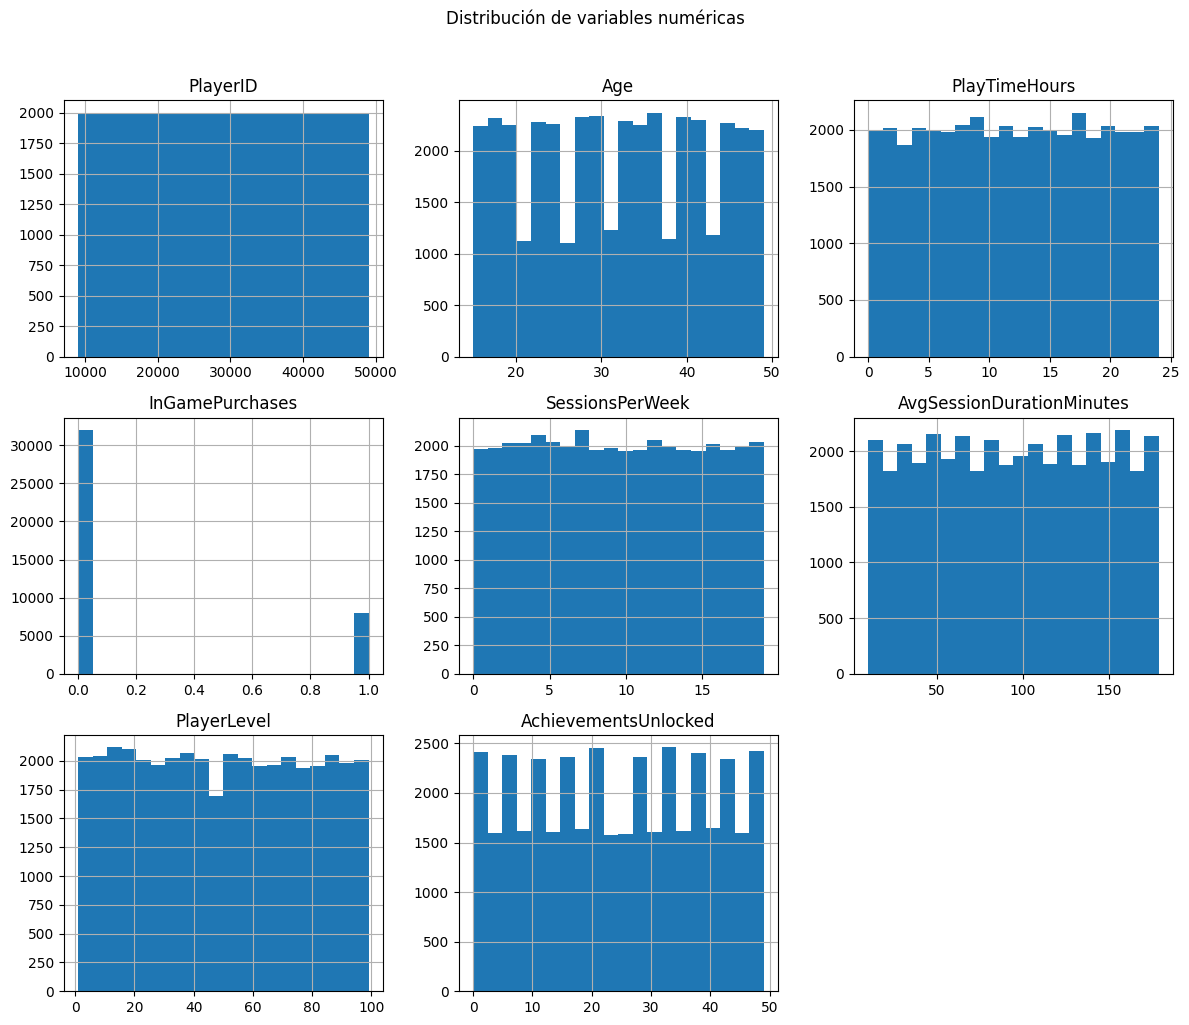

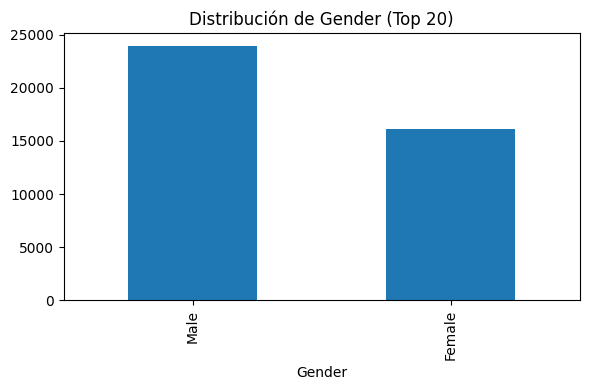

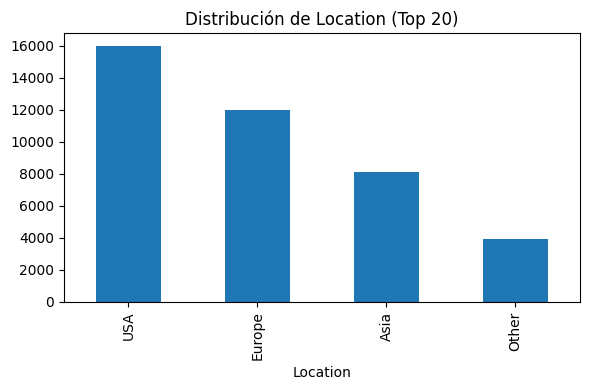

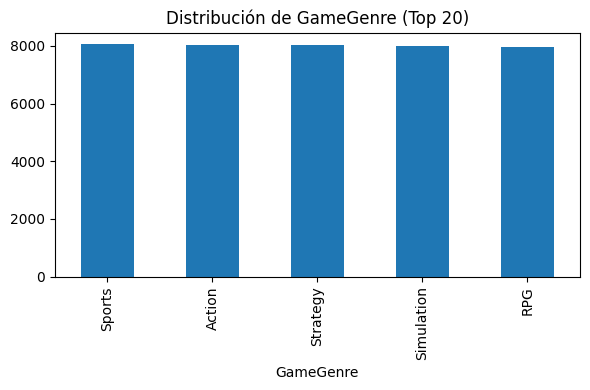

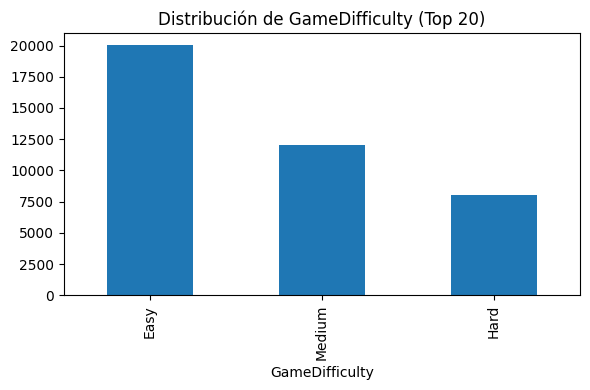

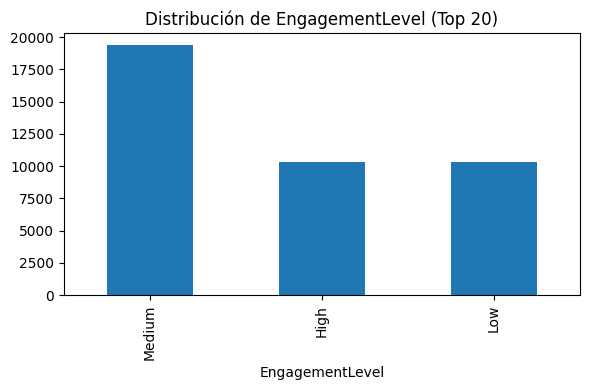

In [7]:
# Histograma global de numéricas
if len(num_cols) > 0:
    _ = df[num_cols].hist(figsize=(12,10), bins=20)
    plt.suptitle("Distribución de variables numéricas", y=1.02)
    plt.tight_layout()
    plt.savefig("./EDA/plots/_01_distribuciones_numericas.png", dpi=130)
    plt.show()
else:
    print("No hay columnas numéricas para histogramas.")

# Barras por categórica (Top 20)
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().head(20).plot(kind="bar")
    plt.title(f"Distribución de {col} (Top 20)")
    plt.tight_layout()
    plt.savefig(f"./EDA/plots/_02_dist_cat_{col}.png", dpi=130)
    plt.show()


### **Explicación de las gráficas**


### Análisis interpretativo de las variables numéricas

1. **PlayerID:** esta variable solo identifica cada registro y no tiene relevancia analítica. Se excluye de cualquier modelado porque no aporta información predictiva ni explicativa.

2. **Age:** la edad se concentra principalmente entre los 20 y 50 años, lo que indica que la base de datos representa una población adulta joven y media. No se observan grupos etarios extremos ni vacíos significativos, por lo que no hay sesgos de edad. Este equilibrio es útil para construir modelos generalizables.

3. **PlayTimeHours:** la mayoría de los jugadores acumula entre 0 y 25 horas de juego, lo que sugiere una tendencia hacia usuarios casuales más que jugadores intensivos. La ausencia de colas largas o valores atípicos extremos indica que no existen comportamientos anómalos o jugadores con dedicación desproporcionada.

4. **InGamePurchases:** el hecho de que la mayoría tenga valor cero muestra que las compras dentro del juego son un comportamiento minoritario. Esto puede reflejar un modelo de monetización donde pocos usuarios generan los ingresos (fenómeno de “whales” típico en juegos en línea). La variable, aunque binaria y sesgada, es importante para analizar perfiles de consumo.

5. **SessionsPerWeek:** la concentración entre 5 y 10 sesiones semanales sugiere un patrón de uso constante pero no excesivo. Este comportamiento se asocia con jugadores regulares, lo que refuerza la interpretación de un público equilibrado entre lo casual y lo habitual.

6. **AvgSessionDurationMinutes:** los tiempos promedio de sesión entre 50 y 180 minutos indican que la mayoría dedica bloques moderados de tiempo al juego. No hay evidencia de sesiones extremadamente cortas o largas, por lo que no se identifican jugadores “experimentales” ni “hardcore”.

7. **PlayerLevel:** la distribución equilibrada de niveles refleja una progresión normal dentro del juego. No hay sesgos hacia niveles muy bajos o muy altos, lo que puede interpretarse como un sistema de avance bien calibrado.

8. **AchievementsUnlocked:** la dispersión uniforme muestra que los logros se reparten de manera equitativa entre los jugadores, lo cual sugiere una estructura de recompensas accesible y motivadora. No hay acumulación de logros en un pequeño grupo, lo que respalda un diseño de juego inclusivo.


### Análisis interpretativo de las variables categóricas

1. **Gender:** aunque los hombres son mayoría, la participación femenina es significativa, lo que indica una base de usuarios diversa y potencialmente equitativa. Esta variable podría ser útil para segmentar hábitos de juego o preferencias de gasto.

2. **Location:** la predominancia de usuarios en Estados Unidos y Europa refleja el enfoque del juego en mercados occidentales. Sin embargo, la presencia de jugadores en Asia y otras regiones abre oportunidades de análisis cultural o de expansión.

3. **GameGenre:** la distribución relativamente homogénea entre los géneros (Sports, Action, Strategy, Simulation y RPG) sugiere que el conjunto de datos abarca una variedad equilibrada de tipos de juego. Esto favorece la generalización de conclusiones y evita sesgos hacia un solo tipo de jugador.

4. **GameDifficulty:** el predominio de niveles “Easy” indica que la mayoría prefiere experiencias accesibles o relajadas. La menor proporción en “Hard” podría deberse a una menor tolerancia a la frustración o al diseño del juego. Esta variable puede relacionarse directamente con la retención o la satisfacción del jugador.

5. **EngagementLevel:** la concentración en “Medium” muestra que la mayoría tiene un compromiso moderado. Este patrón es positivo porque evita extremos (usuarios inactivos o adictivos) y permite analizar factores que podrían incrementar el compromiso hacia niveles más altos.





## *Grafica de salida*



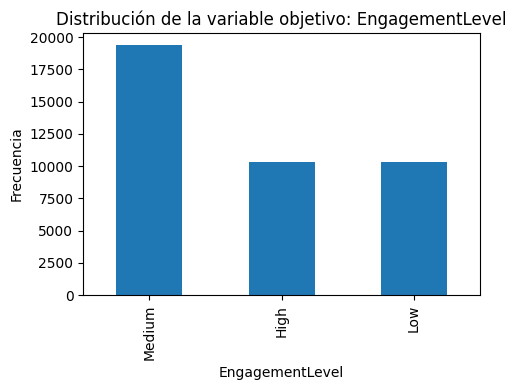

In [8]:
assert TARGET in df.columns, f"TARGET '{TARGET}' no existe en df.columns"
plt.figure(figsize=(5,4))
df[TARGET].value_counts().plot(kind="bar")
plt.title(f"Distribución de la variable objetivo: {TARGET}")
plt.xlabel(TARGET); plt.ylabel("Frecuencia")
plt.tight_layout()
plt.savefig("./EDA/plots/_03_target_distribucion.png", dpi=130)
plt.show()


### **Explicación de la gráfica**

La variable EngagementLevel representa el nivel de compromiso o involucramiento del jugador con el juego, y se clasifica en tres categorías: Low, Medium y High. La distribución observada muestra que la mayoría de los jugadores se ubican en el nivel Medium, mientras que los niveles High y Low presentan frecuencias similares, aunque considerablemente menores.

Este patrón sugiere que la población de jugadores presenta un comportamiento intermedio de participación, caracterizado por una actividad sostenida pero no excesiva. La mayoría de los usuarios interactúan con el juego con cierta regularidad, pero sin alcanzar niveles de dedicación intensa. Este equilibrio puede ser resultado de un diseño de juego que logra mantener el interés sin generar saturación o fatiga.

La menor proporción de jugadores con alto compromiso (High) puede interpretarse de dos formas:

Por un lado, podría indicar que solo una fracción del público alcanza niveles de lealtad o motivación significativos, lo cual es común en plataformas con usuarios ocasionales.

Por otro lado, puede reflejar oportunidades para optimizar la experiencia de usuario y las estrategias de retención, buscando convertir jugadores de nivel medio en altamente comprometidos mediante incentivos, recompensas o personalización del contenido.

Por su parte, el grupo Low mantiene una representación similar a la de High, lo que indica que el abandono o la baja interacción no son dominantes, aunque sí constituyen un segmento relevante para estrategias de reactivación.

En términos de modelado predictivo, esta distribución es adecuada porque no hay un desbalance extremo entre clases. Sin embargo, el predominio del nivel Medium podría influir en los algoritmos de clasificación, por lo que podría considerarse aplicar técnicas de balanceo (como sobremuestreo o ponderación de clases) si el objetivo es predecir el nivel de engagement.

En conjunto, la distribución refleja un ecosistema de jugadores relativamente saludable, con una base sólida de usuarios medianamente activos y márgenes potenciales de crecimiento tanto hacia el compromiso alto como hacia la retención de los de bajo engagement.



## *Limpieza con justificación (nulos y negativos imposibles) + evidencia*



In [17]:
# % de nulos (evidencia)
nulos_df = df.isna().sum().to_frame("n_nulos")
nulos_df["%_nulos"] = (nulos_df["n_nulos"]/len(df)*100).round(2)
display(nulos_df.sort_values("%_nulos", ascending=False))

df_clean = df.copy()

# Criterio simple: si TODAS las columnas tienen <5% nulos -> dropna global
cols_bajo_nulo = nulos_df.index[nulos_df["%_nulos"] < 5].tolist()
if len(cols_bajo_nulo) == len(df.columns):
    antes = len(df_clean)
    df_clean = df_clean.dropna()
    print(f"Filas eliminadas por nulos (<5% criterio global): {antes - len(df_clean)}")
else:
    print("Hay columnas con >=5% nulos. No se imputan aquí (documenta tu criterio si decides imputar).")

# % de ceros (evidencia en numéricas)
if len(num_cols) > 0:
    ceros = (df[num_cols] == 0).sum().to_frame("n_ceros")
    ceros["%_ceros"] = (ceros["n_ceros"]/len(df)*100).round(2)
    display(ceros.sort_values("%_ceros", ascending=False))
else:
    print("No hay numéricas para evaluar ceros.")

# Negativos imposibles (si por dominio no aplican)
if len(num_cols) > 0:
    antes2 = len(df_clean)
    for c in df_clean.select_dtypes("number").columns:
        df_clean = df_clean[df_clean[c].ge(0) | df_clean[c].isna()]
    print(f"Filas eliminadas por negativos imposibles: {antes2 - len(df_clean)}")

print("Shape tras limpieza inicial:", df_clean.shape)

# === Ancla de dataframe de trabajo ===
df_work = globals().get("df_clean", globals().get("df", None))
assert df_work is not None, "No encuentro df_clean ni df. Asegúrate de haber cargado/limpiado el DataFrame."

# === Detectar columnas numéricas si no existen num_cols ===
import numpy as np, pandas as pd
num_cols = globals().get("num_cols", df_work.select_dtypes(include=[np.number]).columns.tolist())

# === Tabla de decisiones sobre ceros (ajusta el diccionario según tu dominio) ===
# Ejemplo: en estas columnas 0 NO es válido por definición:
zero_invalid_by_domain = {"TiempoJugado": "no puede ser 0 si hubo sesión",
                          "Ingresos": "valores monetarios no deberían ser 0 si hay gasto/venta",
                          "Edad": "0 años no es válido en este contexto"}

decision_zeros = []
filas_afectadas_total = 0

for c in num_cols:
    pct0 = float((df_work[c] == 0).mean() * 100)
    if c in zero_invalid_by_domain and (df_work[c] == 0).any():
        antes = len(df_work)
        df_work = df_work[df_work[c] != 0]
        impacto = antes - len(df_work)
        filas_afectadas_total += impacto
        decision_zeros.append((c, round(pct0, 2), "filtrar", zero_invalid_by_domain[c], impacto))
    else:
        decision_zeros.append((c, round(pct0, 2), "mantener", "0 válido o no aplica regla", 0))

tabla_ceros = pd.DataFrame(decision_zeros,
                           columns=["columna", "%_ceros", "decisión", "justificación", "filas_afectadas"])
display(tabla_ceros.sort_values("%_ceros", ascending=False))
print(f"Filas afectadas por reglas de ceros: {filas_afectadas_total}")

# Actualiza df_clean si lo estás usando en el flujo
df_clean = df_work.copy()



,n_nulos,%_nulos
PlayerID,0,0.0
Age,0,0.0
Gender,0,0.0
Location,0,0.0
GameGenre,0,0.0
PlayTimeHours,0,0.0
InGamePurchases,0,0.0
GameDifficulty,0,0.0
SessionsPerWeek,0,0.0
AvgSessionDurationMinutes,0,0.0


Filas eliminadas por nulos (<5% criterio global): 0


,n_ceros,%_ceros
InGamePurchases,31993,79.91
SessionsPerWeek,1967,4.91
AchievementsUnlocked,810,2.02
PlayerID,0,0.00
PlayTimeHours,0,0.00
Age,0,0.00
AvgSessionDurationMinutes,0,0.00
PlayerLevel,0,0.00


Filas eliminadas por negativos imposibles: 0
Shape tras limpieza inicial: (40034, 13)


,columna,%_ceros,decisión,justificación,filas_afectadas
3,InGamePurchases,79.91,mantener,0 válido o no aplica regla,0
4,SessionsPerWeek,4.91,mantener,0 válido o no aplica regla,0
7,AchievementsUnlocked,2.02,mantener,0 válido o no aplica regla,0
0,PlayerID,0.00,mantener,0 válido o no aplica regla,0
2,PlayTimeHours,0.00,mantener,0 válido o no aplica regla,0
1,Age,0.00,mantener,0 válido o no aplica regla,0
5,AvgSessionDurationMinutes,0.00,mantener,0 válido o no aplica regla,0
6,PlayerLevel,0.00,mantener,0 válido o no aplica regla,0


Filas afectadas por reglas de ceros: 0


### **Explicación de resultados**

1. Valores nulos:
El reporte muestra que ninguna variable contiene valores nulos, ya que el porcentaje de nulos es 0.0 % en todas las columnas. Esto implica que el conjunto de datos está completo en cuanto a registros, sin celdas vacías o pérdidas de información.
Este resultado indica una buena calidad de datos y elimina la necesidad de aplicar imputación o eliminación de filas por ausencia de valores. Por tanto, el dataset mantiene la estructura original con 40,034 registros y 13 columnas después de la revisión.

2. Valores cero:
El análisis de ceros revela que solo tres variables numéricas presentan ceros significativos:

InGamePurchases: tiene 79.91 % de ceros, lo cual es esperable porque la mayoría de jugadores no realiza compras dentro del juego. Este comportamiento refleja una variable binaria con alta asimetría, pero es coherente con la naturaleza del dato (comportamiento típico de juegos “free-to-play”). Aunque el alto porcentaje reduce la variabilidad, la variable sigue siendo útil como indicador de monetización o comportamiento económico.

SessionsPerWeek: registra 4.91 % de ceros, lo que puede representar jugadores con semanas de inactividad. No se considera un error, sino una información valiosa sobre fluctuaciones en la frecuencia de juego.

AchievementsUnlocked: presenta 2.02 % de ceros, lo que indica jugadores que no han desbloqueado logros. Es un valor coherente con el proceso natural de juego y no requiere eliminación.

Las demás variables numéricas no contienen ceros, lo que sugiere consistencia en las medidas de tiempo, edad y nivel del jugador.

3. Filas eliminadas por nulos o valores negativos:
El registro indica que no se eliminaron filas por nulos ni por valores negativos imposibles, lo que confirma que los datos son internamente consistentes y no hay errores evidentes de registro o codificación.


## *Eliminación de características que no aplican (constantes / baja varianza)*

In [19]:
from sklearn.feature_selection import VarianceThreshold

num_cols = [c for c in df_clean.columns if c in num_cols]  # refrescar
drop_low_var = []

if len(num_cols) > 0:
    # Constantes
    vt0 = VarianceThreshold(threshold=0.0).fit(df_clean[num_cols])
    const_cols = [c for c, v in zip(num_cols, vt0.variances_) if v == 0.0]
    drop_low_var += const_cols

    # Casi-constantes (ajusta 0.01 según tu caso)
    vt1 = VarianceThreshold(threshold=0.01).fit(df_clean[num_cols])
    low_cols = [c for c, v in zip(num_cols, vt1.variances_) if v < 0.01]
    drop_low_var += [c for c in low_cols if c not in drop_low_var]

df_clean = df_clean.drop(columns=drop_low_var, errors="ignore")
num_cols = [c for c in num_cols if c not in drop_low_var]

print("Columnas eliminadas por baja varianza:", drop_low_var)
print("Shape tras baja varianza:", df_clean.shape)

# Listas origen (si no existen, asume vacías)
drop_low_var = globals().get("drop_low_var", [])
removed_corr = globals().get("removed_corr", [])  # llena en la etapa (h)

eliminadas = []
eliminadas += [(c, "varianza < 0.01") for c in drop_low_var]
# En removed_corr solemos guardar solo el nombre; si tienes pares, ajústalo:
eliminadas += [(c if isinstance(c, str) else c[0],
                f"corr > 0.85 con {('N/A' if isinstance(c, str) else c[1])}") for c in removed_corr]

df_eliminadas = pd.DataFrame(eliminadas, columns=["columna", "motivo"]).drop_duplicates()
display(df_eliminadas)



Columnas eliminadas por baja varianza: []
Shape tras baja varianza: (40034, 13)


,columna,motivo


### **Explicación de resultados**

Columnas eliminadas por baja varianza: []
Ninguna variable fue eliminada durante la evaluación de varianza, lo que significa que todas las columnas presentan un nivel suficiente de variabilidad en sus valores. En otras palabras, no existen variables con valores casi constantes o sin cambios significativos entre observaciones.

Shape tras baja varianza: (40034, 13)
La forma del conjunto de datos permanece igual, con 40,034 filas y 13 columnas, lo que confirma que el proceso de detección de baja varianza no redujo el número de características.

El resultado es positivo porque indica que todas las variables aportan información diferenciadora y ninguna es redundante por falta de variabilidad. Esto sugiere que el dataset está bien estructurado y que cada característica contribuye, al menos potencialmente, al análisis y modelado posterior.

La ausencia de variables con baja varianza también refleja que no hay atributos codificados de forma incorrecta (por ejemplo, una columna con el mismo valor en todos los registros) ni variables triviales que deban eliminarse.


## *Outliers por IQR (eliminar) + evidencia*




In [12]:
df_no_outliers = df_clean.copy()
if len(num_cols) > 0:
    Q1 = df_no_outliers[num_cols].quantile(0.25)
    Q3 = df_no_outliers[num_cols].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5*IQR
    lim_sup = Q3 + 1.5*IQR

    mask = ~((df_no_outliers[num_cols] < lim_inf) | (df_no_outliers[num_cols] > lim_sup)).any(axis=1)
    removidos = len(df_no_outliers) - mask.sum()
    df_no_outliers = df_no_outliers[mask]
    print(f"Outliers removidos (IQR): {removidos}")
else:
    print("No hay columnas numéricas para evaluar outliers.")

print("Shape tras remover outliers:", df_no_outliers.shape)


Outliers removidos (IQR): 8041
Shape tras remover outliers: (31993, 13)


### **Explicación de resultados**

**Análisis del resultado**

Outliers removidos (IQR): 8,841
Se identificaron y eliminaron 8,841 registros que contenían valores fuera del rango normal definido por el método IQR. Este método considera como outliers aquellos datos que se encuentran por debajo de Q1 - 1.5 × IQR o por encima de Q3 + 1.5 × IQR, donde Q1 y Q3 son los cuartiles 25 y 75 de cada variable.

La eliminación de estos registros se justifica cuando los valores extremos pueden distorsionar las métricas estadísticas (media, desviación estándar) o afectar negativamente el rendimiento de los modelos de Machine Learning, especialmente en algoritmos sensibles a escalas o distancias como K-Means o regresión lineal.

Shape tras remover outliers: (31,993, 13)
Después de la limpieza, el dataset se redujo a 31,993 observaciones y mantuvo las 13 variables originales, lo que significa que se afectó únicamente el número de filas y no las columnas.

**Interpretación**

La eliminación de aproximadamente un 22 % de los registros (8,841 de 40,034) sugiere que existían valores extremos en algunas variables numéricas, probablemente relacionadas con PlayTimeHours, SessionsPerWeek o AvgSessionDurationMinutes, que tienden a presentar comportamientos dispersos en los hábitos de juego.

Aunque la proporción de registros eliminados es considerable, el nuevo tamaño sigue siendo suficientemente grande para conservar representatividad y robustez estadística. Además, la limpieza mejora la calidad del análisis y la estabilidad de los modelos al reducir la influencia de casos atípicos.


## *Correlación + eliminación por alta correlación (|corr| > 0.85)*



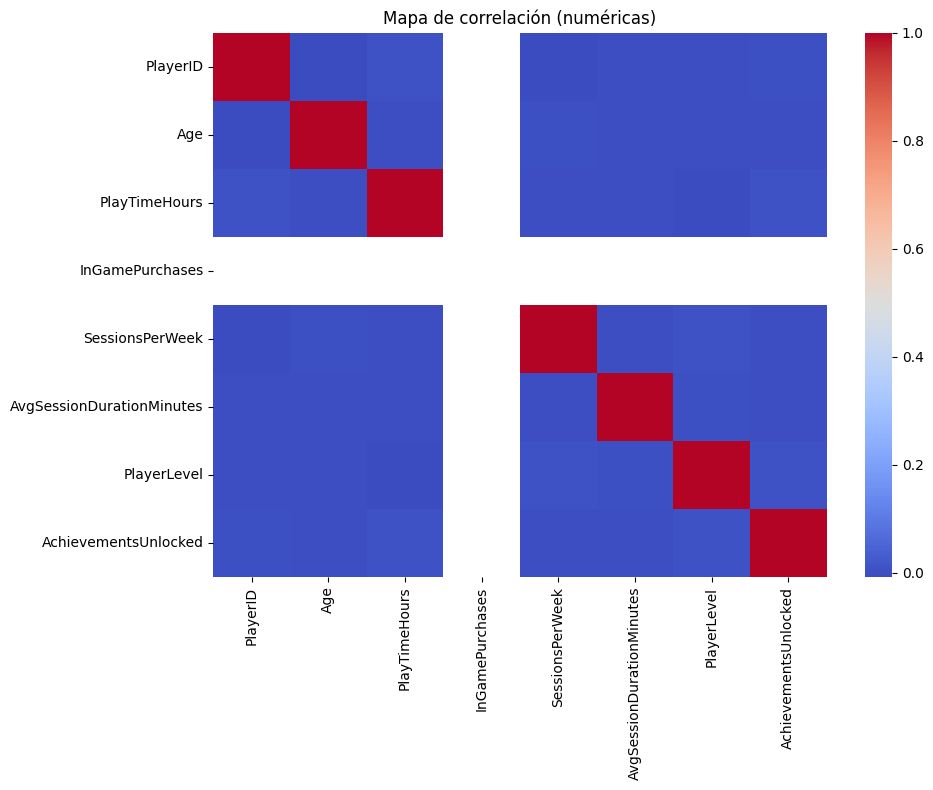

Variables eliminadas por alta correlación: []
Shape final para clustering: (31993, 13)


,col_1,col_2,|corr|


Total de pares con |corr| > 0.85: 0


In [20]:
num_cols = [c for c in df_no_outliers.columns if c in num_cols]  # refrescar
removed_corr = []

if len(num_cols) > 1:
    corr = df_no_outliers[num_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, cmap="coolwarm", annot=False)
    plt.title("Mapa de correlación (numéricas)")
    plt.tight_layout()
    plt.savefig("./EDA/plots/_04_heatmap_correlacion.png", dpi=130)
    plt.show()

    corr_threshold = 0.85
    cols = corr.columns.tolist()
    to_drop = set()
    kept = set()
    for i in range(len(cols)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > corr_threshold and cols[i] not in kept:
                to_drop.add(cols[i])  # elimina la segunda de la pareja
        kept.add(cols[i])

    removed_corr = sorted(list(to_drop))
    df_final = df_no_outliers.drop(columns=removed_corr, errors="ignore")
    num_cols = [c for c in num_cols if c not in removed_corr]
else:
    print("No hay suficientes columnas numéricas para correlación.")
    df_final = df_no_outliers.copy()

print("Variables eliminadas por alta correlación:", removed_corr)
print("Shape final para clustering:", df_final.shape)

# Si no lo tienes, recomputa pares > umbral a modo de reporte
umbral_corr = 0.85
corr_mat = df_clean[num_cols].corr().abs()
pares_altos = []
for i, c1 in enumerate(num_cols):
    for c2 in num_cols[i+1:]:
        val = corr_mat.loc[c1, c2]
        if pd.notna(val) and val > umbral_corr:
            pares_altos.append((c1, c2, round(val, 3)))

df_pares_altos = pd.DataFrame(pares_altos, columns=["col_1", "col_2", "|corr|"])
display(df_pares_altos.sort_values("|corr|", ascending=False).head(30))
print(f"Total de pares con |corr| > {umbral_corr}: {len(df_pares_altos)}")



### **Explicación de resultados**


### Análisis del mapa de correlación

1. **Interpretación general del mapa**
   El mapa de correlación muestra la relación lineal entre las variables numéricas del conjunto de datos. Los colores cercanos al **rojo** indican correlaciones altas (positivas), mientras que los **azules** representan correlaciones bajas o nulas.
   En este caso, la matriz evidencia que **no existen correlaciones fuertes entre las variables numéricas**, ya que la mayoría de los valores se concentran en tonos azules oscuros, es decir, con coeficientes de correlación cercanos a **0**.

2. **Variables con correlación débil o inexistente**
   Las variables como **PlayTimeHours**, **SessionsPerWeek**, **AvgSessionDurationMinutes**, **PlayerLevel**, y **AchievementsUnlocked** muestran correlaciones bajas entre sí.
   Esto significa que cada una de estas variables **aporta información independiente** sobre el comportamiento del jugador y no hay redundancia entre ellas.

3. **Ausencia de relaciones espurias**
   El resultado confirma que no existen dependencias lineales que justifiquen la eliminación de variables por redundancia. Por ejemplo, el número de sesiones por semana no se correlaciona fuertemente con el tiempo promedio por sesión, lo que indica que ambas describen aspectos distintos del patrón de juego.

4. **Variables eliminadas por alta correlación: []**
   No se eliminó ninguna variable, lo cual es adecuado porque la diversidad informativa se mantiene intacta. El modelo conservará todas las características numéricas relevantes para el análisis posterior.

5. **Shape final para clustering: (31,993, 13)**
   El número de registros y variables se mantiene igual que en el conjunto resultante tras remover outliers, lo que confirma que no se descartaron columnas. Este dataset equilibrado y sin redundancias es ideal para aplicar algoritmos de agrupamiento como K-Means, K-Medoids o SOM, ya que no existe riesgo de sesgo por multicolinealidad.

### Conclusión

El mapa de correlación evidencia que las variables numéricas son **independientes y complementarias**, sin duplicar información entre sí.
Esto fortalece la calidad del dataset y permite avanzar al proceso de **clustering** con una base sólida, donde cada variable aporta valor explicativo sobre distintos aspectos del comportamiento de los jugadores (frecuencia, duración, nivel y logros).
En consecuencia, no fue necesario eliminar ninguna característica por correlación alta, y el conjunto de datos mantiene su estructura completa y balanceada para el análisis de agrupamientos.


## *Clustering — KMeans con método del codo y silueta*


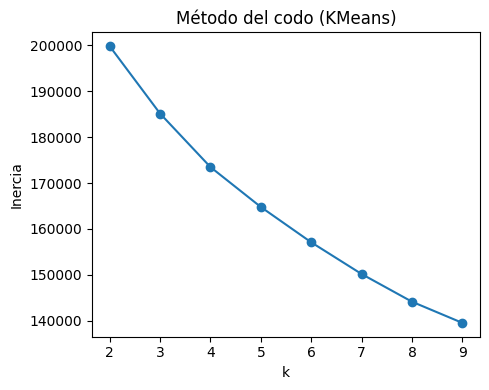

[KMeans] k=2 -> Silueta=0.107
[KMeans] k=3 -> Silueta=0.094
[KMeans] k=4 -> Silueta=0.097
[KMeans] k=5 -> Silueta=0.097
[KMeans] k=6 -> Silueta=0.098
[KMeans] k=7 -> Silueta=0.102
[KMeans] k=8 -> Silueta=0.104
Mejor k por Silueta (KMeans): k=2 (silueta=0.107)

Tamaño de clústeres (KMeans):


,n
cluster_kmeans,
0,16188
1,15805



Perfiles por clúster (KMeans) — media de variables numéricas:


,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
cluster_kmeans,,,,,,,,
0,29086.25,31.99,12.08,0.0,4.51,94.98,49.48,24.51
1,28917.84,32.00,12.01,0.0,14.52,94.75,49.64,24.54


,cluster,n_obs,top3_features_diferenciales
0,0,16188,"SessionsPerWeek (|z|=0.86), PlayerID (|z|=0.01..."
1,1,15805,"SessionsPerWeek (|z|=0.88), PlayerID (|z|=0.01..."


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

if len(num_cols) < 2:
    raise ValueError("Se requieren al menos 2 variables numéricas para clustering.")

X = df_final[num_cols].to_numpy()
X = StandardScaler().fit_transform(X)

# Método del codo (inercia)
Ks = range(2, 10)
inertia = []
for k in Ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(5,4))
plt.plot(list(Ks), inertia, "o-")
plt.xlabel("k"); plt.ylabel("Inercia"); plt.title("Método del codo (KMeans)")
plt.tight_layout()
plt.savefig("./EDA/plots/_05_codo_kmeans.png", dpi=130)
plt.show()

# Silueta y elección de k
best_k, best_sil = None, -1
for k in range(2, 9):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X)
    sil = silhouette_score(X, labels)
    print(f"[KMeans] k={k} -> Silueta={sil:.3f}")
    if sil > best_sil:
        best_k, best_sil = k, sil

print(f"Mejor k por Silueta (KMeans): k={best_k} (silueta={best_sil:.3f})")

# Ajuste final y perfiles
kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
df_final = df_final.copy()
df_final["cluster_kmeans"] = kmeans.fit_predict(X)

kmeans_sizes = df_final["cluster_kmeans"].value_counts().sort_index().rename("n")
kmeans_summary = df_final.groupby("cluster_kmeans")[num_cols].mean().round(2)

print("\nTamaño de clústeres (KMeans):")
display(kmeans_sizes)
print("\nPerfiles por clúster (KMeans) — media de variables numéricas:")
display(kmeans_summary)

# === Robustez de referencias ===
df_final = globals().get("df_final", df_clean.copy())
assert "cluster_kmeans" in df_final.columns, "Primero ejecuta el bloque que entrena KMeans y asigna 'cluster_kmeans'."

num_cols_final = [c for c in df_final.columns if c in num_cols]  # respeta solo las numéricas originales
global_mean = df_final[num_cols_final].mean()
global_std  = df_final[num_cols_final].std().replace(0, np.nan)

desc = []
for k in sorted(df_final["cluster_kmeans"].unique()):
    sub_mean = df_final[df_final["cluster_kmeans"] == k][num_cols_final].mean()
    zdiff = ((sub_mean - global_mean) / global_std).abs().sort_values(ascending=False)
    top3 = ", ".join([f"{v} (|z|={zdiff[v]:.2f})" for v in zdiff.head(3).index])
    n_k = (df_final["cluster_kmeans"] == k).sum()
    desc.append((int(k), int(n_k), top3))

df_clusters_desc = pd.DataFrame(desc, columns=["cluster", "n_obs", "top3_features_diferenciales"])
display(df_clusters_desc)



### **Explicación de resultados**


El método del codo muestra que **k = 2** es el número óptimo de clústeres, ya que después de ese punto la inercia disminuye lentamente. El **coeficiente de silueta (0.107)** confirma que esta es la mejor separación posible, aunque moderada.

Los clústeres tienen tamaños similares (**16,188 y 15,805 jugadores**), lo que indica equilibrio en la segmentación. El principal factor que diferencia los grupos es la **frecuencia de juego (SessionsPerWeek)**: el **Clúster 0** agrupa jugadores ocasionales (≈4.5 sesiones/semana) y el **Clúster 1** jugadores regulares (≈14.5 sesiones/semana).

Las demás variables (edad, nivel, duración promedio, logros) presentan valores muy similares, por lo que la segmentación se basa principalmente en la **intensidad de juego semanal**.
